In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.
C:\Users\Mayank\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mayank\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mayank\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mayank\.conda\envs\tensorflow

In [2]:
x_test = pd.read_csv("test.csv")
x_train = pd.read_csv("train.csv")

In [3]:
x_test_= np.array(x_test)
x_train_ = np.array(x_train)

In [4]:
x_train = x_train_[:,1:]
y_train = x_train_[:,0]
print(x_train.shape,y_train.shape)

x_test = x_test_[:,1:]
y_test = x_test_[:,0]
print(x_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
X_train = x_train.reshape((-1,28,28,1))
X_test = x_test.reshape((-1,28,28,1))

In [6]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [7]:
np.unique(y_test,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [8]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [10]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = "relu", input_shape = (28,28,1)))
model.add(Convolution2D(64,(3,3),activation = "relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = "relu"))
model.add(Convolution2D(8,(5,5),activation = "relu"))
model.add(Flatten())
model.add(Dense(10,activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [11]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [12]:
hist = model.fit(X_train,Y_train,epochs = 10, shuffle = True, batch_size = 256, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 147s 3ms/step - loss: 2.0241 - acc: 0.3126 - val_loss: 1.4255 - val_acc: 0.4947
Epoch 2/10
48000/48000 [==============================] - 157s 3ms/step - loss: 1.1654 - acc: 0.5867 - val_loss: 0.9518 - val_acc: 0.7056
Epoch 3/10
48000/48000 [==============================] - 147s 3ms/step - loss: 0.7175 - acc: 0.7514 - val_loss: 0.6433 - val_acc: 0.7844
Epoch 4/10
48000/48000 [==============================] - 159s 3ms/step - loss: 0.5562 - acc: 0.8097 - val_loss: 0.5353 - val_acc: 0.8175
Epoch 5/10
48000/48000 [==============================] - 130s 3ms/step - loss: 0.4883 - acc: 0.8302 - val_loss: 0.4772 - val_acc: 0.8364
Epoch 6/10
48000/48000 [==============================] - 137s 3ms/step - loss: 0.4435 - acc: 0.8454 - val_loss: 0.4456 - val_acc: 0.8457
Epoch 7/10
48000/48000 [==============================] - 145s 3ms/step - loss: 0.4044 - acc: 0.8570 - val_loss: 0.4384 - 

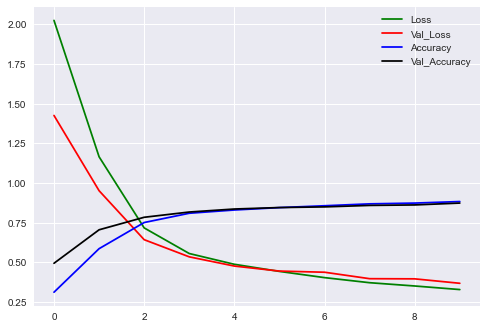

In [14]:
plt.figure(0)
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'g',label = 'Loss')
plt.plot(hist.history['val_loss'],'r', label = 'Val_Loss')
plt.plot(hist.history['acc'],'b', label = 'Accuracy')
plt.plot(hist.history['val_acc'],'black', label = 'Val_Accuracy')
plt.legend()
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 10s 1ms/step
Test loss 0.34852441625595093
Test accuracy 0.8806


In [27]:
Y_pred = model.predict(X_test)

In [29]:
y_pred = []
for i in range(Y_pred.shape[0]):
    y_pred.append(np.argmax(np.round(Y_pred[i])))

In [35]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.87      0.66      1000
           1       0.99      0.96      0.98      1000
           2       0.90      0.71      0.80      1000
           3       0.93      0.85      0.89      1000
           4       0.88      0.76      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.64      0.67      1000
           7       0.95      0.94      0.95      1000
           8       0.99      0.92      0.95      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000

